In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../scripts')
from preprocess import clean_data, find_columns_with_missing_value
from report import data_quality_report, plot_time_series, correlation_matrix

In [128]:
#read data
data = pd.read_csv('../data/benin-malanville.csv')

In [129]:
#variables info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [ ]:
find_columns_with_missing_value(data)   

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [ ]:
df_copy = data.copy()

['Comments']

In [ ]:
target_cols = [ 'GHI', 'DNI', 'DHI', 'ModA', 'ModB','WS', 'WSgust']

In [ ]:
before_dataclean = data_quality_report(df_copy)
before_dataclean

In [ ]:
# finding zscore
#target_cols = ['GHI', 'DNI', 'DHI', 'ModA','ModB', 'WS','WSgust']
#score = np.abs(zscore(data[target_cols]))
#outlier_flag = (score > 3).any(axis=1)
#outlier_flag.sum()

np.int64(0)

In [ ]:
cleaned_data = clean_data(df_copy, target_cols)

In [ ]:
after_clean_report = data_quality_report(cleaned_data)
after_clean_report


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,1.2,0.2,1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,1.1,0.2,1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,1.1,0.2,1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,1.1,0.1,1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,1.0,0.1,1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
5,2021-08-09 00:06,1.0,0.1,1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3
6,2021-08-09 00:07,1.0,0.1,1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3
7,2021-08-09 00:08,1.0,0.1,1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3
8,2021-08-09 00:09,1.0,0.1,1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4
9,2021-08-09 00:10,1.0,0.1,1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4


In [ ]:
cleaned_data.to_csv(f"../data/benin_clean.csv")

In [ ]:
plot_time_series(cleaned_data, target_cols)

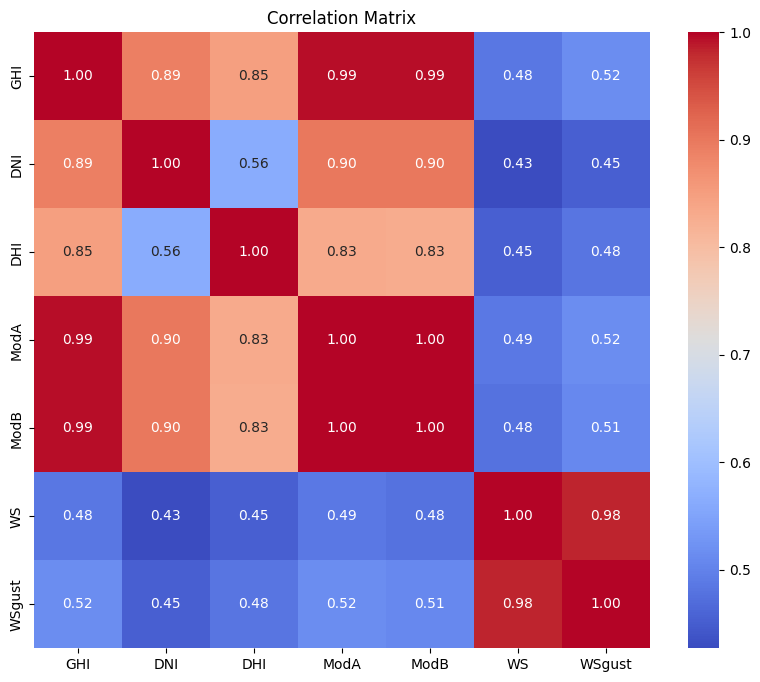

In [ ]:
correlation_matrix(cleaned_data, target_cols)

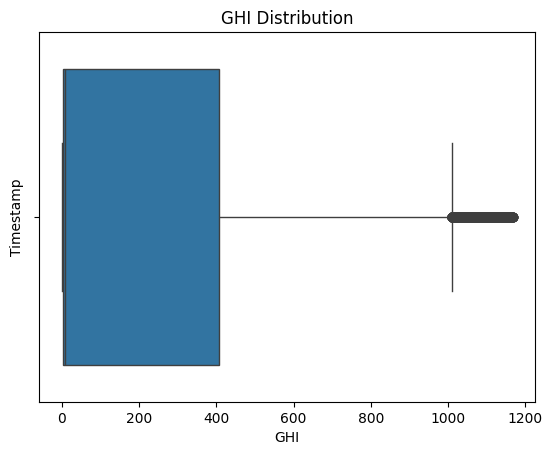

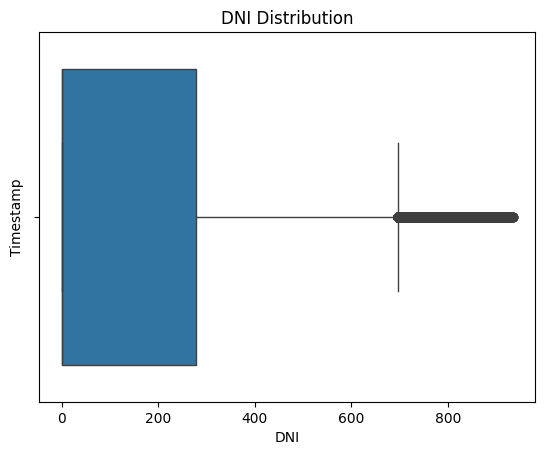

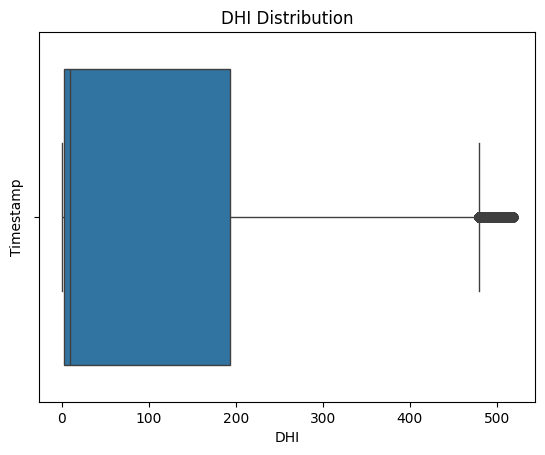

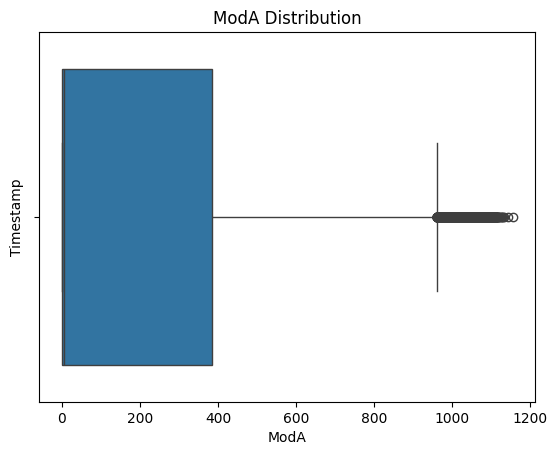

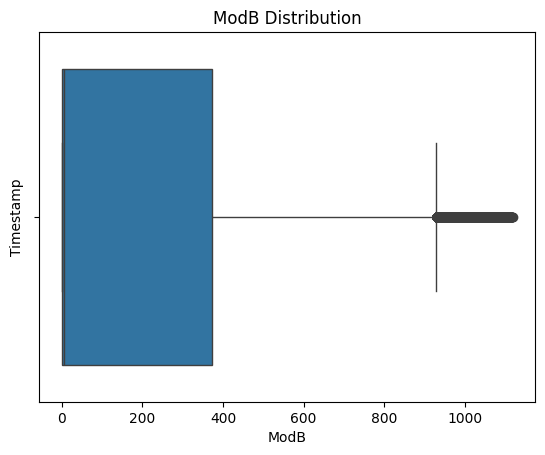

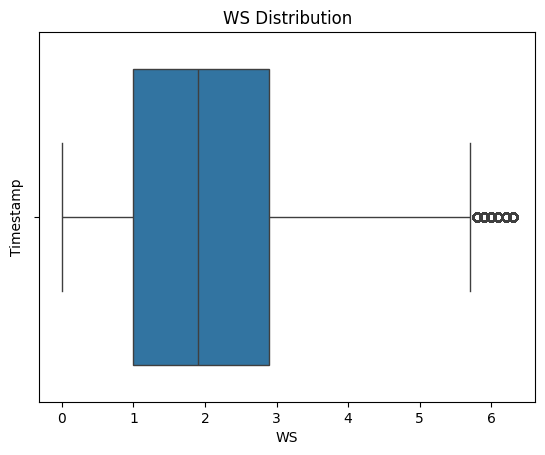

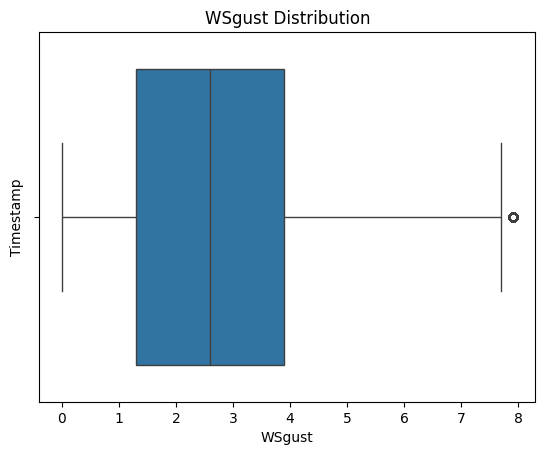

In [203]:
for col in target_cols:
    sb.boxplot(data, x=data[col])
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Timestamp")
    plt.show()